<a href="https://colab.research.google.com/github/Usama1039/ISYS5002_2023_S2_Thursday/blob/main/05_3_stocks_daily_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module CSV

### Reading and Writing CSV file

Text files work fine when we are referencing small amounts of information, but when we use larger amounts of data, adding structure helps in organizing and retrieving values.

One common format found in business and social sciences alike (as well as any field concerned with data science) is the comma-separated values (CSV) format.

**CSV files** are the most common format used for importing and exporting data from spreadsheets and databases.

CSV files are text files that have delimiters.  A **delimiter** is a character that separates data values.

You can explore CSV files in spreadsheet software (such as Microsoft Excel), which will remove delimiters (usually commas) and store data values in separate cells.


One of the benefits of importing data files such as CSV files is the ability to read in a lot of data at once, parsing the data so your code can access individual values within the data. **By default, CSV files use commas (“,”) to separate data values**.



## Working with large CSV file

In [1]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1653004800&period2=1661040000&interval=1d&events=history&includeAdjustedClose=true" > NABData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4531  100  4531    0     0  15652      0 --:--:-- --:--:-- --:--:-- 15678


In [ ]:
import csv

#open file and write records
with open("NABData.csv", 'r')  as data:
  reader = csv.reader(data)
  print(next(reader))
  print(next(reader))
  print(next(reader))


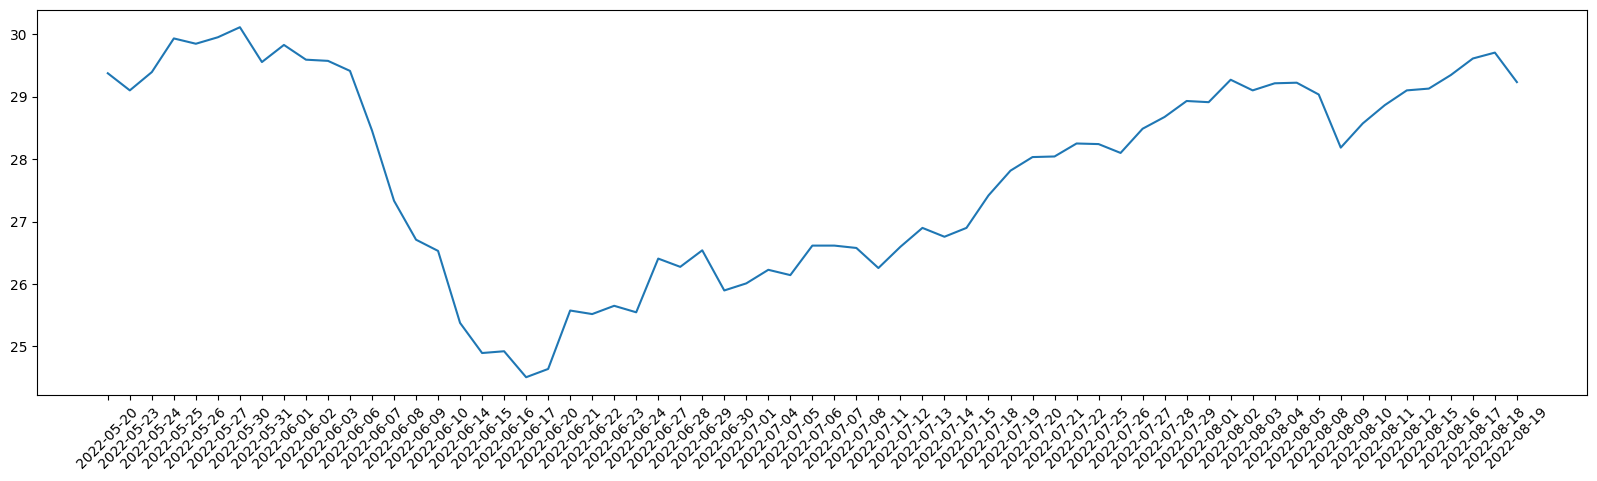

In [2]:
import csv

# initialize two empty lists, date and close, where the extracted data will be stored later
date = []
close = []

# open file and write records
with open("NABData.csv", 'r')  as data: # opens the file named "NABData.csv" in read mode ('r')

  # creates a CSV reader object reader by passing the file object data to the csv.reader() function.
  # This reader will allow us to iterate through the rows of the CSV file.
  reader = csv.reader(data)
  header = next(reader, None) # reads the first row of the CSV file using the next() function, which advances the reader to the next row. This is often done to skip the header row that contains column names.
  #print(header)
  for record in reader:
    date.append(record[0]) # extracts the value from the first column of the current record and appends it to the date list
    close.append(float(record[5])) # extracts the value from the sixth column of the current record, converts it to a floating-point number using the float() function, and then appends it to the close list

# plot the results
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.xticks(rotation=45)
plt.plot(date, close)


# Module Pandas

## Using Pandas Module to Read in CSV Files (the “Easy Way”)

An easier method of importing files into Python is using the **Pandas** module. Pandas (name derived from “panel data”) is a data analysis library that, among other things, makes reading in CSV files and accessing the contained data much easier

The primary data structure used in Pandas are a ***DataFrame***. A DataFrame has a *two-dimensional tabular format using rows and columns*. Using a DataFrame, we can reference columns by name, rather than having to count to figure out which column number we want. Pandas provides an assortment of methods like .mean() that will do summary statistics on our data


Read From a CSV File Using Pandas

Source: *Kaefer, F., & Kaefer, P. (2020). Introduction to Python
Programming for Business and Social Science Applications. SAGE Publications, Inc. (US).*

In [3]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/BHP.AX?period1=1629553321&period2=1661089321&interval=1d&events=history&includeAdjustedClose=true" > BHPData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17550    0 17550    0     0  68138      0 --:--:-- --:--:-- --:--:-- 68023


In [9]:
import pandas as pd

In [23]:
df = pd.read_csv('BHPData.csv')

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-23,44.959999,45.070000,44.200001,44.459999,35.399979,11096534
1,2021-08-24,44.860001,45.189999,44.619999,44.919998,35.766235,8552123
2,2021-08-25,45.410000,45.740002,45.250000,45.480000,36.212116,9721644
3,2021-08-26,45.509998,45.599998,44.900002,44.950001,35.790127,7817371
4,2021-08-27,44.889999,45.070000,44.680000,44.700001,35.591072,7089293


In [13]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2022-08-15,39.180000,39.400002,38.799999,38.919998,34.468349,6904742
248,2022-08-16,39.930000,41.049999,39.700001,40.509998,35.876484,13033610
249,2022-08-17,41.290001,41.330002,40.430000,40.849998,36.177593,11111378
250,2022-08-18,40.680000,41.189999,40.500000,41.150002,36.443283,10311777
251,2022-08-19,41.470001,42.000000,41.389999,41.549999,36.797527,14648168


In [26]:
df [10:30]

,Date,Open,High,Low,Close,Adj Close,Volume
10,2021-09-06,42.500000,42.570000,42.000000,42.189999,35.748138,5371782
11,2021-09-07,42.070000,42.090000,41.389999,42.040001,35.621037,8831973
12,2021-09-08,41.939999,41.939999,41.520000,41.610001,35.256699,8065586
13,2021-09-09,41.500000,41.540001,40.759998,40.919998,34.672050,7009624
14,2021-09-10,41.130001,41.360001,40.910000,41.250000,34.951668,6237567
15,2021-09-13,41.400002,41.869999,41.160000,41.480000,35.146545,5215795
16,2021-09-14,41.680000,41.970001,41.220001,41.730000,35.358379,7921516
17,2021-09-15,40.930000,40.959999,40.200001,40.259998,34.112823,8622716
18,2021-09-16,40.950001,41.209999,40.500000,40.650002,34.443279,10578653
19,2021-09-17,39.799999,39.880001,38.910000,39.160000,33.180779,18831400


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,42.760563,43.136822,42.364490,42.751142,36.977998,1.212857e+07
std,4.636933,4.654260,4.597700,4.642915,4.365076,2.063323e+07
min,35.700001,36.220001,35.560001,35.560001,30.130453,2.203033e+06
25%,38.647500,38.927499,38.250000,38.570000,33.326156,7.532998e+06
50%,41.850676,42.130402,41.520000,41.794033,35.896414,9.648043e+06
75%,46.410001,46.880001,46.072501,46.475001,40.468867,1.253209e+07
max,53.180000,53.720001,53.060001,53.169998,47.088436,3.274170e+08


In [16]:
df[10:20] # retrieve a subset of rows from the DataFrame df, starting from the row with index 10 and ending with the row with index 19

,Date,Open,High,Low,Close,Adj Close,Volume
10,2021-09-06,42.500000,42.570000,42.000000,42.189999,35.748138,5371782
11,2021-09-07,42.070000,42.090000,41.389999,42.040001,35.621037,8831973
12,2021-09-08,41.939999,41.939999,41.520000,41.610001,35.256699,8065586
13,2021-09-09,41.500000,41.540001,40.759998,40.919998,34.672050,7009624
14,2021-09-10,41.130001,41.360001,40.910000,41.250000,34.951668,6237567
15,2021-09-13,41.400002,41.869999,41.160000,41.480000,35.146545,5215795
16,2021-09-14,41.680000,41.970001,41.220001,41.730000,35.358379,7921516
17,2021-09-15,40.930000,40.959999,40.200001,40.259998,34.112823,8622716
18,2021-09-16,40.950001,41.209999,40.500000,40.650002,34.443279,10578653
19,2021-09-17,39.799999,39.880001,38.910000,39.160000,33.180779,18831400


In [17]:
# extract two columns from the df
df[['Date', 'Adj Close']]

,Date,Adj Close
0,2021-08-23,35.399979
1,2021-08-24,35.766235
2,2021-08-25,36.212116
3,2021-08-26,35.790127
4,2021-08-27,35.591072
...,...,...
247,2022-08-15,34.468349
248,2022-08-16,35.876484
249,2022-08-17,36.177593
250,2022-08-18,36.443283


In [18]:
# create a new data frame that contains only Date and Adj Close columns
df_data = df[['Date', 'Adj Close']]

In [19]:
df_data

,Date,Adj Close
0,2021-08-23,35.399979
1,2021-08-24,35.766235
2,2021-08-25,36.212116
3,2021-08-26,35.790127
4,2021-08-27,35.591072
...,...,...
247,2022-08-15,34.468349
248,2022-08-16,35.876484
249,2022-08-17,36.177593
250,2022-08-18,36.443283


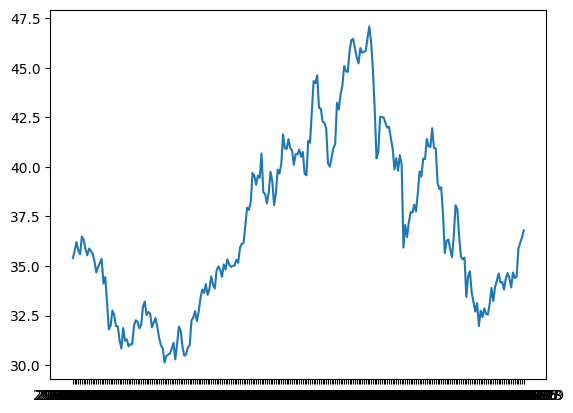

In [20]:
from matplotlib import pyplot as plt

plt.plot(df_data['Date'], df_data['Adj Close'])


In [27]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-23,44.959999,45.070000,44.200001,44.459999,35.399979,11096534
1,2021-08-24,44.860001,45.189999,44.619999,44.919998,35.766235,8552123
2,2021-08-25,45.410000,45.740002,45.250000,45.480000,36.212116,9721644
3,2021-08-26,45.509998,45.599998,44.900002,44.950001,35.790127,7817371
4,2021-08-27,44.889999,45.070000,44.680000,44.700001,35.591072,7089293
...,...,...,...,...,...,...,...
247,2022-08-15,39.180000,39.400002,38.799999,38.919998,34.468349,6904742
248,2022-08-16,39.930000,41.049999,39.700001,40.509998,35.876484,13033610
249,2022-08-17,41.290001,41.330002,40.430000,40.849998,36.177593,11111378
250,2022-08-18,40.680000,41.189999,40.500000,41.150002,36.443283,10311777


In [ ]:
# shift the values in the 'Adj Close' column by one position (one day back).
# add a new column named 'shift(1)' to the DataFrame 'df'



In [ ]:
df.head()

In [ ]:
'''
Calculates the daily return for the 'Adj Close' values in the DataFrame
Subtracts the previous day's 'Adj Close' value from the current day's 'Adj Close' value
and then divides by the previous day's 'Adj Close' value, and then multiplies by 100 to express the result as a percentage change.
'''



In [ ]:
# The calculated daily return values are stored in a new column named 'daily_return' in the DataFrame df



In [ ]:
# plot graph Date and 'daily_return'


## Daily Return of Stock Data

### Daily Return formula

Visiting a financial website that provides stock price information. Type a company’s name or its stock’s ticker symbol. Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was \$36.75 yesterday and that its closing price was \$35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract \$35.50 from \$36.75 to get \$1.25.

Now divide the results by the previous day's closing prices to calculate the daily return.  Multiply this by 100 to convert to a percentage.  So $1.25 divided by #35.50 equals 0.035.  Multiply 0.035 by 100 to 3.5 percent.

    Daily return = (Today prices - Yesterday price) / Yesterday price



To find the URL, navigate to Yahoo finance, type in NAB.AX, click the 'Historical' tab.  towards the right is a download option.  right click on the download link and select 'Copy Link Address' form the popup menu.  Now paste to the URL assignment statement.

In [30]:
df[['Date' , 'Adj Close']]

,Date,Adj Close
0,2021-08-23,35.399979
1,2021-08-24,35.766235
2,2021-08-25,36.212116
3,2021-08-26,35.790127
4,2021-08-27,35.591072
...,...,...
247,2022-08-15,34.468349
248,2022-08-16,35.876484
249,2022-08-17,36.177593
250,2022-08-18,36.443283


Sources:

*Kaefer, F., & Kaefer, P. (2020). Introduction to Python
Programming for Business and Social Science Applications. SAGE Publications, Inc. (US).*

*Tony Gaddis, Starting out with Python, 5th Edition*

*Deitel & Deitel, Intro to Python for Computer Science and Data Science, Global Edition*
